# 1. Introduction

I will analyse the youtube data to undersand the US videos patterns.

We will find for some informations like:

Whats the most frequent type of video?
The distribuition of views, likes, comments and engamet is equal for all category's?
We have normal distribuition to the values?
Whats the most frequent names in title, description, tags?

# 2. Input libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
#from subprocess import check_output
#from wordcloud import WordCloud, STOPWORDS

# 3. Load the data

In [3]:
with open('US_category_id.json','r') as file:
    data=json.load(file)

In [4]:
category_dict={}
for item in data['items']:
    category_id=item['id']
    title=item['snippet']['title']
    category_dict[category_id]=title
       

In [5]:
category_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [6]:
df_cat_name=pd.DataFrame(list(category_dict.items()),columns=['category_id','category_name'])

In [7]:
df_cat_name

,category_id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [8]:
df = pd.read_csv("USvideos.csv")

In [9]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [11]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [12]:
#add col of category_name
int_category_dict={int(k): v for k, v in category_dict.items()}


In [13]:
int_category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [14]:
df['category_name']=df['category_id'].replace(int_category_dict)

In [15]:
df.head(50)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,Science & Technology
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,Entertainment
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....,Science & Technology
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",Film & Animation
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo...",News & Politics


# 4. Explore the data

## 4.1 Video counts by different categories

In [16]:
#check video categories
df.category_id.unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43],
      dtype=int64)

In [17]:
#change category_id col to str instead of numeric
df.category_id=df.category_id.astype('str')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  object
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [19]:
df.category_name.unique()

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', 'Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)

In [20]:
df_count_by_cat=df.groupby('category_name').size().to_frame()

In [21]:
df_count_by_cat.rename(columns={0:'Counts'},inplace=True)

In [22]:
df_count_by_cat=df_count_by_cat.reset_index()

In [23]:
df_count_by_cat

,category_name,Counts
0,Autos & Vehicles,384
1,Comedy,3457
2,Education,1656
3,Entertainment,9964
4,Film & Animation,2345
5,Gaming,817
6,Howto & Style,4146
7,Music,6472
8,News & Politics,2487
9,Nonprofits & Activism,57


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Autos & Vehicles'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Film & Animation'),
  Text(5, 0, 'Gaming'),
  Text(6, 0, 'Howto & Style'),
  Text(7, 0, 'Music'),
  Text(8, 0, 'News & Politics'),
  Text(9, 0, 'Nonprofits & Activism'),
  Text(10, 0, 'People & Blogs'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Science & Technology'),
  Text(13, 0, 'Shows'),
  Text(14, 0, 'Sports'),
  Text(15, 0, 'Travel & Events')])

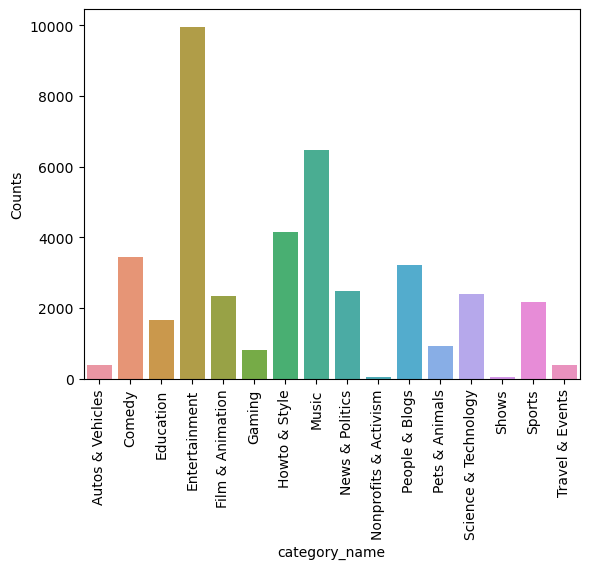

In [24]:
sns.barplot(data=df_count_by_cat,x='category_name',y='Counts')
plt.xticks(rotation=90)

top 3 categories of the videos are entertainment, music and howto&style

## 4.2 Engagement features of videos by different categories 

In [25]:
df_copy=df.copy()
col_to_log=['views','likes','dislikes','comment_count']

df_copy[col_to_log]=df_copy[col_to_log].apply(np.log)


In [26]:
df_copy.describe()

,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04
mean,13.337984,-inf,-inf,-inf
std,1.710016,NaN,NaN,NaN
min,6.308098,-inf,-inf,-inf
25%,12.398052,8.598589e+00,5.308268e+00,6.419995e+00
50%,13.432581,9.803170e+00,6.447306e+00,7.526179e+00
75%,14.416080,1.092264e+01,7.569412e+00,8.657824e+00
max,19.232552,1.554074e+01,1.433098e+01,1.412416e+01


In [27]:
df_copy.replace(-np.inf,0,inplace=True)

In [28]:
df_copy.describe()

,views,likes,dislikes,comment_count
count,40949.000000,40949.000000,40949.000000,40949.000000
mean,13.337984,9.597534,6.376278,7.382277
std,1.710016,2.121741,1.939075,2.070028
min,6.308098,0.000000,0.000000,0.000000
25%,12.398052,8.598589,5.308268,6.419995
50%,13.432581,9.803170,6.447306,7.526179
75%,14.416080,10.922642,7.569412,8.657824
max,19.232552,15.540743,14.330977,14.124156


Text(0, 0.5, 'views(log)')

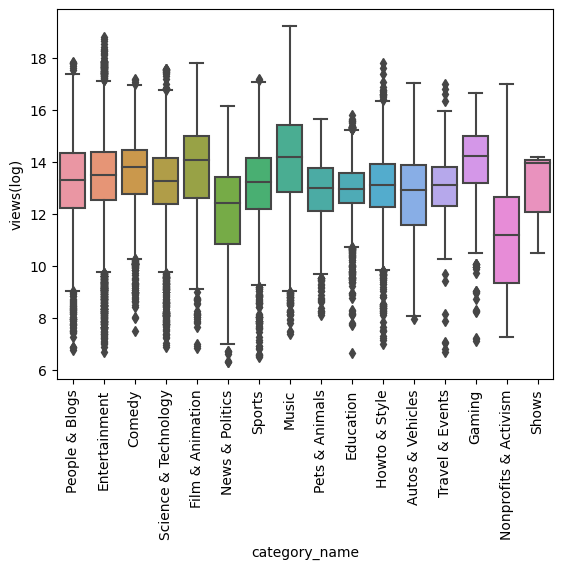

In [29]:
sns.boxplot(data=df_copy, x="category_name", y="views")
plt.xticks(rotation=90)
plt.ylabel('views(log)')

In [30]:
#group the video by category_id, get value counts for views, likes, dislikes and comment_counts
df_rank_by_views=df.groupby('category_name').sum().sort_values(by='views', ascending=False)

In [31]:
df_rank_by_views=df_rank_by_views.reset_index()

In [32]:
df_rank_by_views

,category_name,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,Music,40132892190,1416838584,51179008,125296396,9,24,0
1,Entertainment,20604388195,530516491,42987663,73566498,196,30,8
2,Film & Animation,7284156721,165997476,6075148,17887060,28,14,13
3,Comedy,5117426208,216346746,7230391,22545582,2,0,0
4,People & Blogs,4917191726,186615999,10187901,24778032,66,37,0
5,Sports,4404456673,98621211,5133551,11192155,28,17,2
6,Howto & Style,4078545064,162880075,5473899,23149550,11,11,0
7,Science & Technology,3487756816,82532638,4548402,11989926,90,16,0
8,Gaming,2141218625,69038284,9184466,14740713,8,0,0
9,News & Politics,1473765704,18151033,4180049,6039433,174,1,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Film & Animation'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Sports'),
  Text(6, 0, 'Howto & Style'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'News & Politics'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Autos & Vehicles'),
  Text(13, 0, 'Travel & Events'),
  Text(14, 0, 'Nonprofits & Activism'),
  Text(15, 0, 'Shows')])

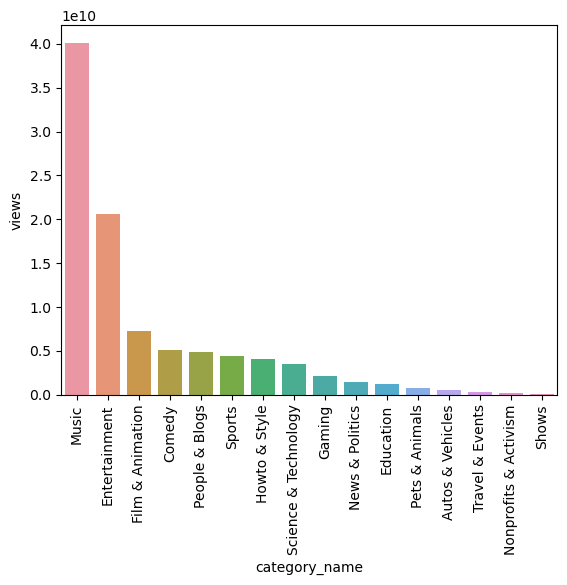

In [33]:
sns.barplot(data=df_rank_by_views, x="category_name", y="views")
plt.xticks(rotation=90)


Text(0, 0.5, 'likes(log)')

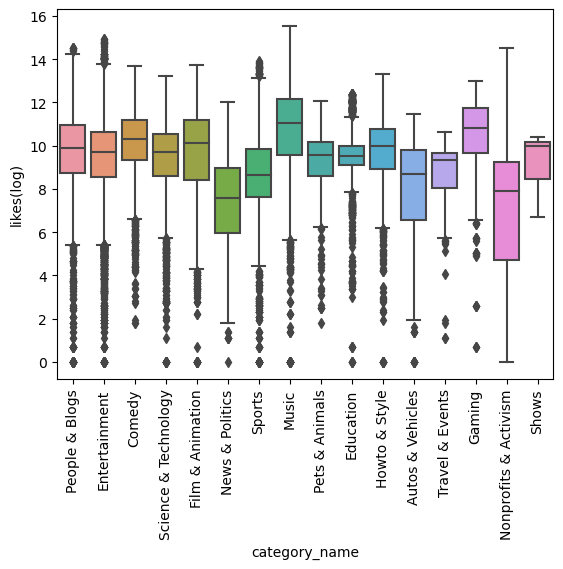

In [34]:
sns.boxplot(data=df_copy, x="category_name", y="likes")
plt.xticks(rotation=90)
plt.ylabel('likes(log)')

In [35]:
df_rank_by_likes=df.groupby('category_name').sum().sort_values(by='likes', ascending=False)

In [36]:
df_rank_by_likes=df_rank_by_likes.reset_index()

In [37]:
df_rank_by_likes

,category_name,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,Music,40132892190,1416838584,51179008,125296396,9,24,0
1,Entertainment,20604388195,530516491,42987663,73566498,196,30,8
2,Comedy,5117426208,216346746,7230391,22545582,2,0,0
3,People & Blogs,4917191726,186615999,10187901,24778032,66,37,0
4,Film & Animation,7284156721,165997476,6075148,17887060,28,14,13
5,Howto & Style,4078545064,162880075,5473899,23149550,11,11,0
6,Sports,4404456673,98621211,5133551,11192155,28,17,2
7,Science & Technology,3487756816,82532638,4548402,11989926,90,16,0
8,Gaming,2141218625,69038284,9184466,14740713,8,0,0
9,Education,1180629990,49257772,1351972,5442242,8,5,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'People & Blogs'),
  Text(4, 0, 'Film & Animation'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Education'),
  Text(10, 0, 'Pets & Animals'),
  Text(11, 0, 'News & Politics'),
  Text(12, 0, 'Nonprofits & Activism'),
  Text(13, 0, 'Travel & Events'),
  Text(14, 0, 'Autos & Vehicles'),
  Text(15, 0, 'Shows')])

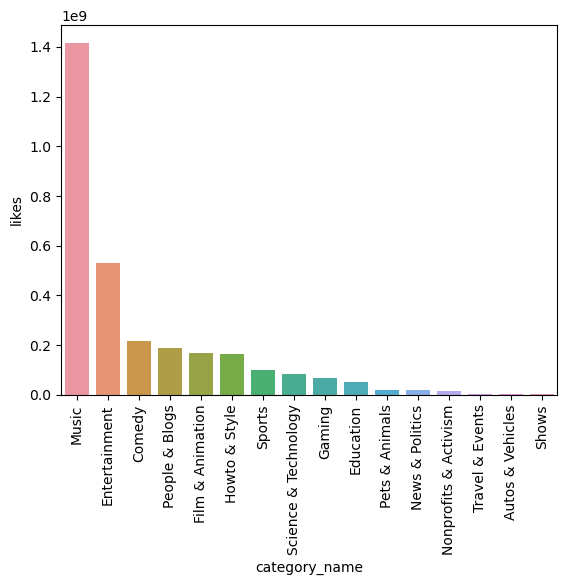

In [38]:
sns.barplot(data=df_rank_by_likes, x="category_name", y="likes")
plt.xticks(rotation=90)

similar pattern was found across different categories of videos whether ranked by "views" or "likes"

In [39]:
df_rank_by_dislikes=df.groupby('category_name').sum().sort_values(by='dislikes', ascending=False)

In [40]:
df_rank_by_dislikes

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_name,,,,,,,
Music,40132892190,1416838584,51179008,125296396,9,24,0
Entertainment,20604388195,530516491,42987663,73566498,196,30,8
People & Blogs,4917191726,186615999,10187901,24778032,66,37,0
Gaming,2141218625,69038284,9184466,14740713,8,0,0
Comedy,5117426208,216346746,7230391,22545582,2,0,0
Film & Animation,7284156721,165997476,6075148,17887060,28,14,13
Howto & Style,4078545064,162880075,5473899,23149550,11,11,0
Sports,4404456673,98621211,5133551,11192155,28,17,2
Science & Technology,3487756816,82532638,4548402,11989926,90,16,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'People & Blogs'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Film & Animation'),
  Text(6, 0, 'Howto & Style'),
  Text(7, 0, 'Sports'),
  Text(8, 0, 'Science & Technology'),
  Text(9, 0, 'News & Politics'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Education'),
  Text(12, 0, 'Pets & Animals'),
  Text(13, 0, 'Travel & Events'),
  Text(14, 0, 'Autos & Vehicles'),
  Text(15, 0, 'Shows')])

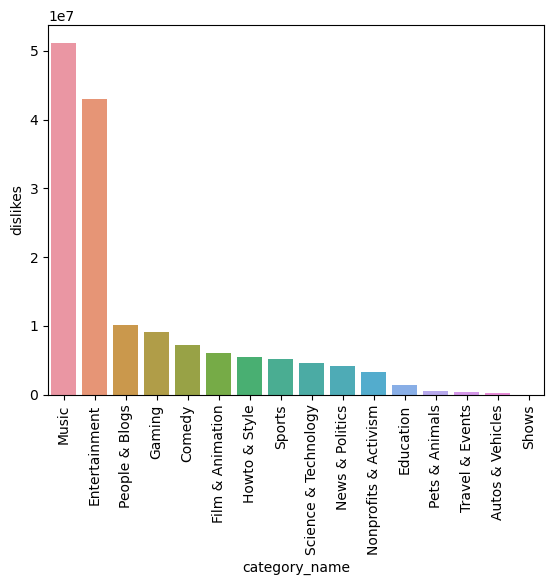

In [41]:
df_rank_by_dislikes=df_rank_by_dislikes.reset_index()
sns.barplot(data=df_rank_by_dislikes, x="category_name", y="dislikes")
plt.xticks(rotation=90)

In [42]:
df['likes_ratio']=df['likes']/df['views']

In [43]:
df_rank_by_likes_ratio=df.groupby('category_name').mean().sort_values(by='likes_ratio', ascending=False)

In [44]:
df_rank_by_likes_ratio

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,likes_ratio
category_name,,,,,,,,
Music,6.201003e+06,218918.199011,7907.757726,19359.764524,0.001391,0.003708,0.000000,0.047565
Howto & Style,9.837301e+05,39286.076942,1320.284370,5583.586589,0.002653,0.002653,0.000000,0.044993
Comedy,1.480308e+06,62582.223315,2091.521840,6521.718831,0.000579,0.000000,0.000000,0.043884
People & Blogs,1.531835e+06,58135.825234,3173.800935,7719.013084,0.020561,0.011526,0.000000,0.041805
Nonprofits & Activism,2.963884e+06,259923.614035,58076.859649,84364.859649,0.070175,0.070175,0.000000,0.037904
Education,7.129408e+05,29745.031401,816.408213,3286.378019,0.004831,0.003019,0.000000,0.037760
Gaming,2.620831e+06,84502.183599,11241.696450,18042.488372,0.009792,0.000000,0.000000,0.037300
Pets & Animals,8.311435e+05,21055.110870,573.238043,2892.070652,0.004348,0.000000,0.000000,0.033471
Science & Technology,1.452627e+06,34374.276551,1894.378176,4993.721783,0.037484,0.006664,0.000000,0.030612


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Howto & Style'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'People & Blogs'),
  Text(4, 0, 'Nonprofits & Activism'),
  Text(5, 0, 'Education'),
  Text(6, 0, 'Gaming'),
  Text(7, 0, 'Pets & Animals'),
  Text(8, 0, 'Science & Technology'),
  Text(9, 0, 'Entertainment'),
  Text(10, 0, 'Film & Animation'),
  Text(11, 0, 'Shows'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Sports'),
  Text(15, 0, 'News & Politics')])

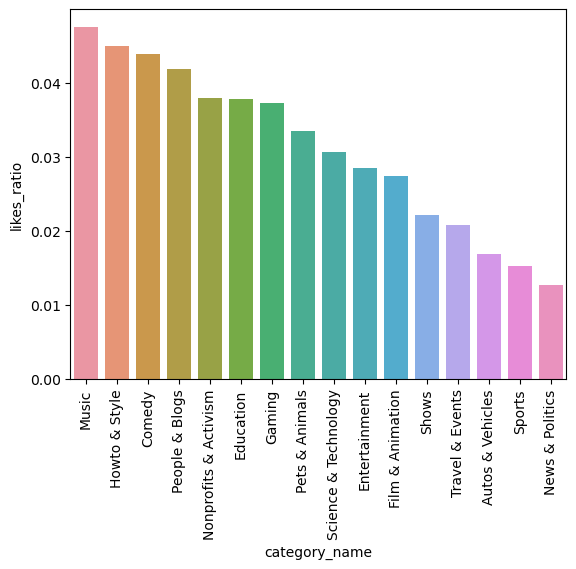

In [45]:
df_rank_by_likes_ratio=df_rank_by_likes_ratio.reset_index()
sns.barplot(data=df_rank_by_likes_ratio, x="category_name", y="likes_ratio")
plt.xticks(rotation=90)

In [46]:
df['dislikes_ratio']=df['dislikes']/df['views']
df_rank_by_dislikes_ratio=df.groupby('category_name').mean().sort_values(by='dislikes_ratio', ascending=False)
df_rank_by_dislikes_ratio

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,likes_ratio,dislikes_ratio
category_name,,,,,,,,,
Nonprofits & Activism,2.963884e+06,259923.614035,58076.859649,84364.859649,0.070175,0.070175,0.000000,0.037904,0.003965
News & Politics,5.925877e+05,7298.364696,1680.759550,2428.400885,0.069964,0.000402,0.000000,0.012695,0.003950
Gaming,2.620831e+06,84502.183599,11241.696450,18042.488372,0.009792,0.000000,0.000000,0.037300,0.002537
People & Blogs,1.531835e+06,58135.825234,3173.800935,7719.013084,0.020561,0.011526,0.000000,0.041805,0.002052
Entertainment,2.067883e+06,53243.325070,4314.297772,7383.229426,0.019671,0.003011,0.000803,0.028527,0.001589
Comedy,1.480308e+06,62582.223315,2091.521840,6521.718831,0.000579,0.000000,0.000000,0.043884,0.001528
Film & Animation,3.106250e+06,70787.836247,2590.681450,7627.744136,0.011940,0.005970,0.005544,0.027419,0.001418
Science & Technology,1.452627e+06,34374.276551,1894.378176,4993.721783,0.037484,0.006664,0.000000,0.030612,0.001390
Howto & Style,9.837301e+05,39286.076942,1320.284370,5583.586589,0.002653,0.002653,0.000000,0.044993,0.001335


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Nonprofits & Activism'),
  Text(1, 0, 'News & Politics'),
  Text(2, 0, 'Gaming'),
  Text(3, 0, 'People & Blogs'),
  Text(4, 0, 'Entertainment'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Howto & Style'),
  Text(9, 0, 'Travel & Events'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'Music'),
  Text(12, 0, 'Sports'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Pets & Animals'),
  Text(15, 0, 'Shows')])

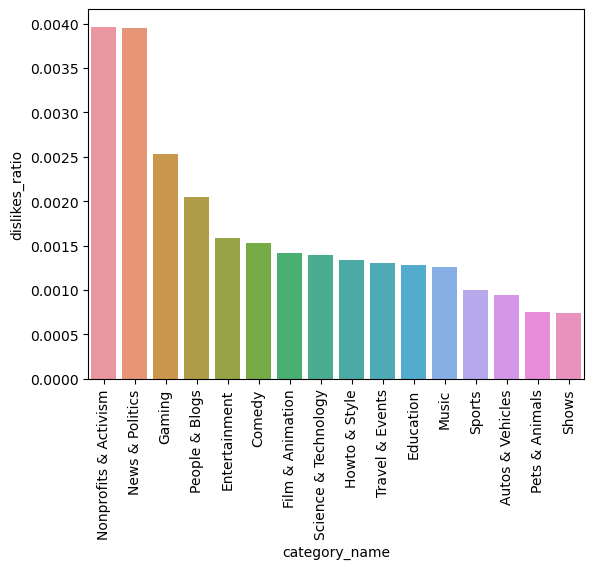

In [47]:
df_rank_by_dislikes_ratio=df_rank_by_dislikes_ratio.reset_index()
sns.barplot(data=df_rank_by_dislikes_ratio, x="category_name", y="dislikes_ratio")
plt.xticks(rotation=90)

In [48]:
df['comment_rate']=df['comment_count']/df['views']
df_rank_by_comment_rate=df.groupby('category_name').mean().sort_values(by='comment_rate', ascending=False)
df_rank_by_comment_rate

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,likes_ratio,dislikes_ratio,comment_rate
category_name,,,,,,,,,,
Gaming,2.620831e+06,84502.183599,11241.696450,18042.488372,0.009792,0.000000,0.000000,0.037300,0.002537,0.007459
Nonprofits & Activism,2.963884e+06,259923.614035,58076.859649,84364.859649,0.070175,0.070175,0.000000,0.037904,0.003965,0.007306
News & Politics,5.925877e+05,7298.364696,1680.759550,2428.400885,0.069964,0.000402,0.000000,0.012695,0.003950,0.006416
Howto & Style,9.837301e+05,39286.076942,1320.284370,5583.586589,0.002653,0.002653,0.000000,0.044993,0.001335,0.005890
Comedy,1.480308e+06,62582.223315,2091.521840,6521.718831,0.000579,0.000000,0.000000,0.043884,0.001528,0.005219
People & Blogs,1.531835e+06,58135.825234,3173.800935,7719.013084,0.020561,0.011526,0.000000,0.041805,0.002052,0.004819
Education,7.129408e+05,29745.031401,816.408213,3286.378019,0.004831,0.003019,0.000000,0.037760,0.001283,0.004507
Science & Technology,1.452627e+06,34374.276551,1894.378176,4993.721783,0.037484,0.006664,0.000000,0.030612,0.001390,0.004136
Pets & Animals,8.311435e+05,21055.110870,573.238043,2892.070652,0.004348,0.000000,0.000000,0.033471,0.000754,0.004015


Based on the analysis above, it can be concluded that Music is the most engaging and popular among viewers. This category not only received the highest number of views and likes but also had the highest likes ratio (likes/views), indicating a strong positive reception and high viewer satisfaction. This suggests that content in Music resonates well with the audience, making it a key area for further content development and focus.
In contract, category Nonprofits&Activism and Shows are not very popular in terms of views and likes. Nonprofits&Activism received considerable negative feedback due to its high dislike ratio, but it recieved relatively high comment_rate. In contrast, Shows has least negative ratio, but struggle to get positive engagement due to it's low likes ratio. Overall, we may need to take actions to improve performance of category Nonprofits&Activism and Shows.



## 4.3 Content status analysis 

In [49]:
removed_video_counts=df.groupby('category_name')['video_error_or_removed'].value_counts().to_frame()

In [50]:
removed_video_counts.columns

Index(['video_error_or_removed'], dtype='object')

In [51]:
removed_video_counts.rename(columns={'video_error_or_removed':'video_counts'},inplace=True)

In [52]:
removed_video_counts=removed_video_counts.reset_index()

In [53]:
removed_video_counts

,category_name,video_error_or_removed,video_counts
0,Autos & Vehicles,False,384
1,Comedy,False,3457
2,Education,False,1656
3,Entertainment,False,9956
4,Entertainment,True,8
5,Film & Animation,False,2332
6,Film & Animation,True,13
7,Gaming,False,817
8,Howto & Style,False,4146
9,Music,False,6472


In [54]:
removed_video_df=removed_video_counts.merge(df_count_by_cat,left_on='category_name',right_on='category_name', how='left')

In [55]:
removed_ratio_df=removed_video_df[removed_video_df['video_error_or_removed']==False]

In [56]:
removed_ratio_df

,category_name,video_error_or_removed,video_counts,Counts
0,Autos & Vehicles,False,384,384
1,Comedy,False,3457,3457
2,Education,False,1656,1656
3,Entertainment,False,9956,9964
5,Film & Animation,False,2332,2345
7,Gaming,False,817,817
8,Howto & Style,False,4146,4146
9,Music,False,6472,6472
10,News & Politics,False,2487,2487
11,Nonprofits & Activism,False,57,57


In [57]:
removed_ratio_df['removed_ratio']=1-removed_ratio_df['video_counts']/removed_ratio_df['Counts']

C:\Users\ygao10\AppData\Local\Temp\ipykernel_12880\3887924686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_ratio_df['removed_ratio']=1-removed_ratio_df['video_counts']/removed_ratio_df['Counts']


In [58]:
removed_ratio_df

,category_name,video_error_or_removed,video_counts,Counts,removed_ratio
0,Autos & Vehicles,False,384,384,0.000000
1,Comedy,False,3457,3457,0.000000
2,Education,False,1656,1656,0.000000
3,Entertainment,False,9956,9964,0.000803
5,Film & Animation,False,2332,2345,0.005544
7,Gaming,False,817,817,0.000000
8,Howto & Style,False,4146,4146,0.000000
9,Music,False,6472,6472,0.000000
10,News & Politics,False,2487,2487,0.000000
11,Nonprofits & Activism,False,57,57,0.000000


In [59]:
comments_disable_counts=df.groupby('category_name')['comments_disabled'].value_counts().to_frame()

comments_disable_counts.rename(columns={'comments_disabled':'video_counts'},inplace=True)

comments_disable_counts=comments_disable_counts.reset_index()

comments_disable_counts_df=comments_disable_counts.merge(df_count_by_cat,left_on='category_name',right_on='category_name', how='left')

In [60]:
comments_disable_counts_df

,category_name,comments_disabled,video_counts,Counts
0,Autos & Vehicles,False,379,384
1,Autos & Vehicles,True,5,384
2,Comedy,False,3455,3457
3,Comedy,True,2,3457
4,Education,False,1648,1656
5,Education,True,8,1656
6,Entertainment,False,9768,9964
7,Entertainment,True,196,9964
8,Film & Animation,False,2317,2345
9,Film & Animation,True,28,2345


In [61]:
comments_disable_ratio_df=comments_disable_counts_df[comments_disable_counts_df['comments_disabled']==False]
comments_disable_ratio_df['comment_disable_ratio']=1-comments_disable_ratio_df['video_counts']/comments_disable_ratio_df['Counts']

comments_disable_ratio_df=comments_disable_ratio_df.sort_values(by='comment_disable_ratio',ascending=False)

C:\Users\ygao10\AppData\Local\Temp\ipykernel_12880\701172226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_disable_ratio_df['comment_disable_ratio']=1-comments_disable_ratio_df['video_counts']/comments_disable_ratio_df['Counts']


In [62]:
comments_disable_ratio_df

,category_name,comments_disabled,video_counts,Counts,comment_disable_ratio
18,Nonprofits & Activism,False,53,57,0.070175
16,News & Politics,False,2313,2487,0.069964
24,Science & Technology,False,2311,2401,0.037484
20,People & Blogs,False,3144,3210,0.020561
6,Entertainment,False,9768,9964,0.019671
0,Autos & Vehicles,False,379,384,0.013021
27,Sports,False,2146,2174,0.012879
8,Film & Animation,False,2317,2345,0.011940
10,Gaming,False,809,817,0.009792
4,Education,False,1648,1656,0.004831


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Nonprofits & Activism'),
  Text(1, 0, 'News & Politics'),
  Text(2, 0, 'Science & Technology'),
  Text(3, 0, 'People & Blogs'),
  Text(4, 0, 'Entertainment'),
  Text(5, 0, 'Autos & Vehicles'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Film & Animation'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Education'),
  Text(10, 0, 'Pets & Animals'),
  Text(11, 0, 'Howto & Style'),
  Text(12, 0, 'Music'),
  Text(13, 0, 'Comedy'),
  Text(14, 0, 'Shows'),
  Text(15, 0, 'Travel & Events')])

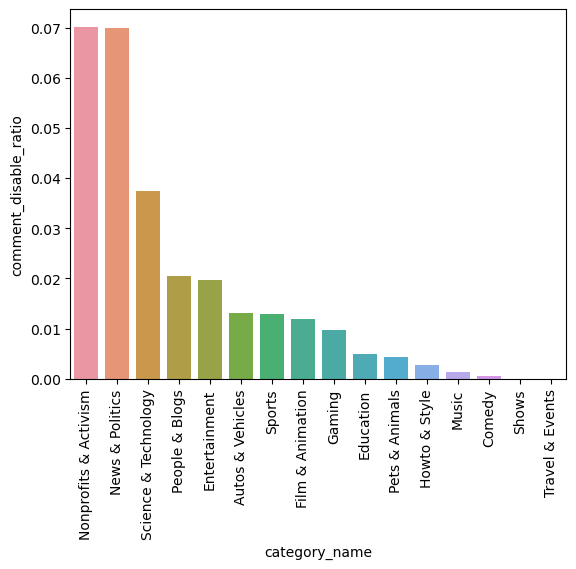

In [63]:

sns.barplot(data=comments_disable_ratio_df, x="category_name", y="comment_disable_ratio")
plt.xticks(rotation=90)

In [64]:
rating_disable_counts=df.groupby('category_name')['ratings_disabled'].value_counts().to_frame()

rating_disable_counts.rename(columns={'ratings_disabled':'video_counts'},inplace=True)

rating_disable_counts=rating_disable_counts.reset_index()

rating_disable_counts_df=rating_disable_counts.merge(df_count_by_cat,left_on='category_name',right_on='category_name', how='left')

In [65]:
rating_disable_counts_df

,category_name,ratings_disabled,video_counts,Counts
0,Autos & Vehicles,False,374,384
1,Autos & Vehicles,True,10,384
2,Comedy,False,3457,3457
3,Education,False,1651,1656
4,Education,True,5,1656
5,Entertainment,False,9934,9964
6,Entertainment,True,30,9964
7,Film & Animation,False,2331,2345
8,Film & Animation,True,14,2345
9,Gaming,False,817,817


In [66]:
ratings_disable_ratio_df=rating_disable_counts_df[rating_disable_counts_df['ratings_disabled']==False]

ratings_disable_ratio_df['ratings_disable_ratio']=1-ratings_disable_ratio_df['video_counts']/ratings_disable_ratio_df['Counts']

ratings_disable_ratio_df=ratings_disable_ratio_df.sort_values(by='ratings_disable_ratio',ascending=False)

C:\Users\ygao10\AppData\Local\Temp\ipykernel_12880\651144375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_disable_ratio_df['ratings_disable_ratio']=1-ratings_disable_ratio_df['video_counts']/ratings_disable_ratio_df['Counts']


In [67]:
ratings_disable_ratio_df

,category_name,ratings_disabled,video_counts,Counts,ratings_disable_ratio
16,Nonprofits & Activism,False,53,57,0.070175
0,Autos & Vehicles,False,374,384,0.026042
18,People & Blogs,False,3173,3210,0.011526
24,Sports,False,2157,2174,0.007820
21,Science & Technology,False,2385,2401,0.006664
7,Film & Animation,False,2331,2345,0.005970
12,Music,False,6448,6472,0.003708
3,Education,False,1651,1656,0.003019
5,Entertainment,False,9934,9964,0.003011
10,Howto & Style,False,4135,4146,0.002653


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Nonprofits & Activism'),
  Text(1, 0, 'Autos & Vehicles'),
  Text(2, 0, 'People & Blogs'),
  Text(3, 0, 'Sports'),
  Text(4, 0, 'Science & Technology'),
  Text(5, 0, 'Film & Animation'),
  Text(6, 0, 'Music'),
  Text(7, 0, 'Education'),
  Text(8, 0, 'Entertainment'),
  Text(9, 0, 'Howto & Style'),
  Text(10, 0, 'News & Politics'),
  Text(11, 0, 'Comedy'),
  Text(12, 0, 'Gaming'),
  Text(13, 0, 'Pets & Animals'),
  Text(14, 0, 'Shows'),
  Text(15, 0, 'Travel & Events')])

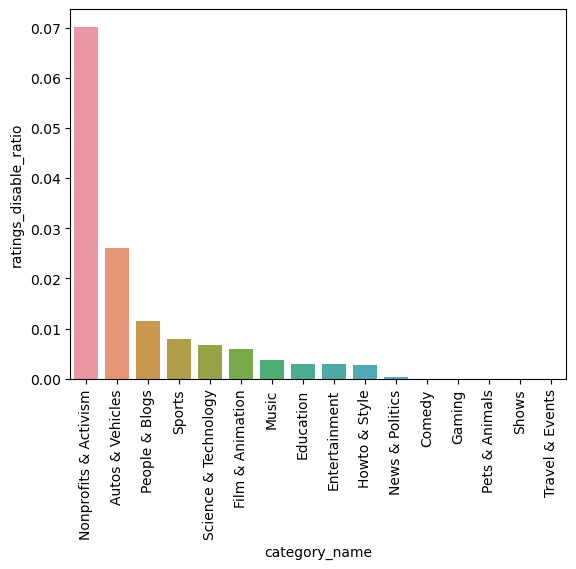

In [68]:

sns.barplot(data=ratings_disable_ratio_df, x="category_name", y="ratings_disable_ratio")
plt.xticks(rotation=90)

Nonprofits&Activism, Politics categories often attract a diverse audience with varying opinions, leading to potential conflicts in ratings and comments. Creators might disable these features to maintain a positive user experience and prevent negative interactions. On the other hand, shows and Travel videos have fewer disabled features, indicating a more constructive and less controversial viewer base.
This suggest Content creators in highly interactive categories like Nonprofits&Activism or Politics should be aware of the potential for negative interactions and consider disabling comments or ratings if they observe a significant amount of disruptive behavior. For travel content creators, maintaining open ratings and comments can foster a positive and engaging learning environment.

## 4.4 Publish timing analysis

In [69]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['month'] = df['publish_time'].dt.month


In [70]:
month_count_df=df['month'].value_counts().to_frame()

In [71]:
month_count_df=month_count_df.reset_index()

In [72]:
month_count_df.rename(columns={'index':'Month','month':'video_counts'},inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

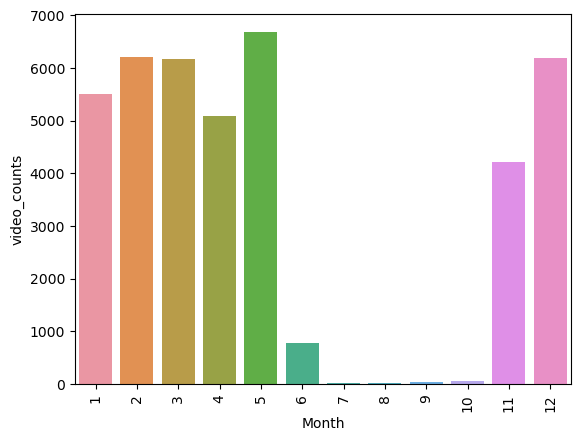

In [73]:
sns.barplot(data=month_count_df, x="Month", y="video_counts")
plt.xticks(rotation=90)

In [77]:
#group the data based on category_name, find out which category has longest publishing time
df_pub_time=df.groupby("category_name")['month'].agg(['min','max','mean'])

In [78]:
df_pub_time

,min,max,mean
category_name,,,
Autos & Vehicles,1,12,5.104167
Comedy,1,12,5.591264
Education,1,12,4.887077
Entertainment,1,12,5.335809
Film & Animation,1,12,5.306183
Gaming,1,12,4.477356
Howto & Style,1,12,5.118669
Music,1,12,5.478677
News & Politics,1,12,5.398472


In [79]:
df_pub_time=df_pub_time.sort_values(by='mean')

In [80]:
df_pub_time

,min,max,mean
category_name,,,
Gaming,1,12,4.477356
Nonprofits & Activism,1,12,4.491228
Education,1,12,4.887077
Sports,1,12,5.042318
Science & Technology,1,12,5.048313
Pets & Animals,1,12,5.071739
Autos & Vehicles,1,12,5.104167
Howto & Style,1,12,5.118669
Film & Animation,1,12,5.306183


In [81]:
df_pub_time=df_pub_time.reset_index()

Text(0, 0.5, 'Mean publishing time(months)')

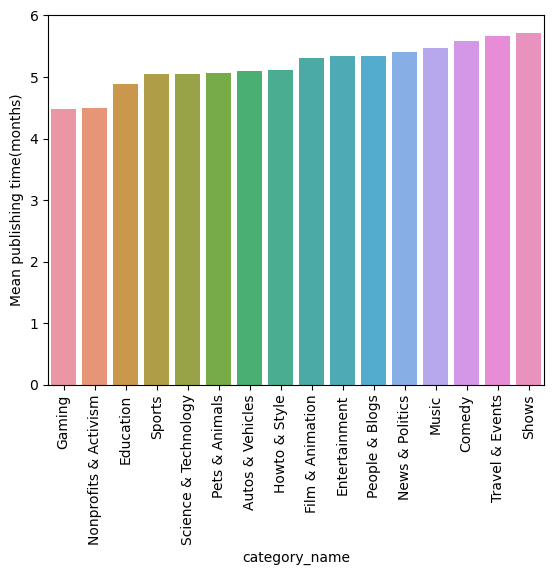

In [84]:
sns.barplot(data=df_pub_time, x='category_name',y='mean')
plt.xticks(rotation=90)
plt.ylabel('Mean publishing time(months)')

On average, gaming has shortest mean publishing time, shows has highest.

## 4.5 Correlation between numeric features

In [85]:
numeric_cols=df.select_dtypes(include='number').columns

In [86]:
df_numeric=df[numeric_cols]

In [87]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   views           40949 non-null  int64  
 1   likes           40949 non-null  int64  
 2   dislikes        40949 non-null  int64  
 3   comment_count   40949 non-null  int64  
 4   likes_ratio     40949 non-null  float64
 5   dislikes_ratio  40949 non-null  float64
 6   comment_rate    40949 non-null  float64
 7   month           40949 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 2.5 MB


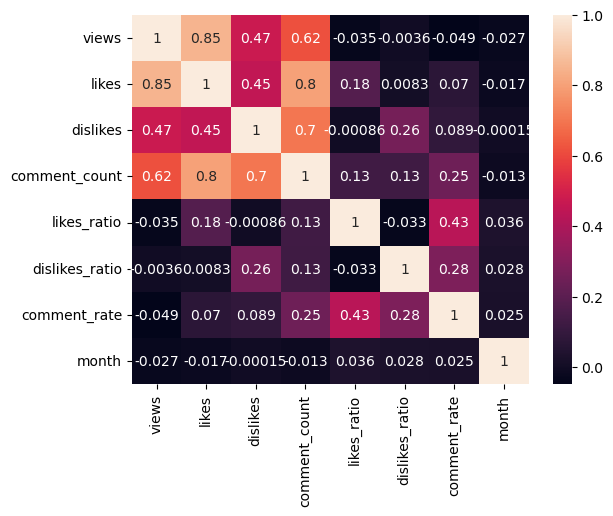

In [88]:
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

views has high correlation with likes, comment_counts, and dislikes, indicating videos with higher views have overall higher engagement, popular videos has both positve and negative feedbacks